# 应用库的加载

In [1]:
import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Tensorflow 与 OpenCv的基本操作

In [2]:
import tensorflow as tf

In [2]:
a = tf.constant('hello tf!')
sess = tf.Session()
print(sess.run(a))

b'hello tf!'


In [1]:
import cv2

In [2]:
img = cv2.imread('img/example.jpg',1) #图片名称 /0，黑白 1，彩色
for x in range(100):
    img[x,100] = (255,0,0)# img[行数，列数]
cv2.imshow('me',img)
cv2.waitKey()# 括号内可以传入暂停秒数，然后继续程序

-1

In [13]:
a = tf.constant(2.5)# 常量
b = tf.Variable(10,name = 'var')#变量
print(a)
print(b)
sess = tf.Session()
print(sess.run(a))#打印常量需用Session的run方法
init = tf.global_variables_initializer()#打印变量需先初始化
sess.run(init)
print(sess.run(b))
sess.close()#最后还要关闭
'''
本质tf = tensor + 计算图
tensor 数据
op
graphs 数据操作
Session
'''
#或者用with方法：
init = tf.global_variables_initializer()
sess = tf.Session()
with sess:
    sess.run(init)
    print(sess.run(b))

Tensor("Const_7:0", shape=(), dtype=float32)
<tf.Variable 'var_6:0' shape=() dtype=int32_ref>
2.5
10
10


# tf常量与变量的运算

In [18]:
a = tf.constant(6)
b = tf.constant(2)
Add = tf.add(a,b)
Mul = tf.multiply(a,b)
Sub = tf.subtract(a,b)
Div = tf.divide(a,b)
with tf.Session() as sess:
    print(sess.run(Add))
    print(sess.run(Sub))
    print(sess.run(Mul))
    print(sess.run(Div))
    print('constant and constant')

a = tf.constant(6)
b = tf.Variable(2)
Add = tf.add(a,b)
Mul = tf.multiply(a,b)
Sub = tf.subtract(a,b)
Div = tf.divide(a,b)
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    print(sess.run(Add))
    print(sess.run(Sub))
    print(sess.run(Mul))
    print(sess.run(Div))
    print(b.eval())#计算图实现的另一种方法 eval方法,相当于get_default_session().run()
    print('constant and variable')

8
4
12
3.0
constant and constant
8
4
12
3.0
2
constant and variable


# tf 矩阵基础

In [19]:
#placehold
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)
Add = tf.add(a, b)
with tf.Session() as sess:
    print(sess.run(Add,feed_dict = {a:6,b:2})) #用了一个先定义后传参的方法 feed_dict

8.0


In [25]:
#矩阵切片与运算法则
a = tf.constant([[6,6]])
b = tf.constant([[2],
                 [2]])
c = tf.constant([[3,3]])
Mul = tf.matmul(a,b)
Add = tf.add(a,c)
with tf.Session() as sess:
    print(sess.run([a[0],b[0],a[:,0],a[:,1]]))#矩阵的切片
    print(sess.run([Mul,Add]))#sess传入列表打印多个tensor的值

[array([6, 6]), array([2]), array([6]), array([6])]
[array([[24]]), array([[9, 9]])]


In [33]:
mat0 = tf.zeros([2,3])
mat1 = tf.ones([3,2])
mat2 = tf.fill([2,3],15)
mat3 = tf.zeros_like(mat2)#零阵填充
mat4 = tf.linspace(0.,2.,11)# 线性切分
mat5 = tf.random_uniform([2,3],-1,2)# 随机矩阵[维度]，最小值，最大值
with tf.Session() as sess:
    print(sess.run([mat3,mat4,mat5]))

[array([[0, 0, 0],
       [0, 0, 0]]), array([0.       , 0.2      , 0.4      , 0.6      , 0.8      , 1.       ,
       1.2      , 1.4      , 1.6      , 1.8000001, 2.       ],
      dtype=float32), array([[0.5626224 , 1.2264972 , 0.3403195 ],
       [0.35516214, 0.81942   , 1.4905043 ]], dtype=float32)]


# numpy矩阵与matplotlib复习

In [3]:
import numpy as np #详见python数据分析笔记
import matplotlib.pyplot as plt

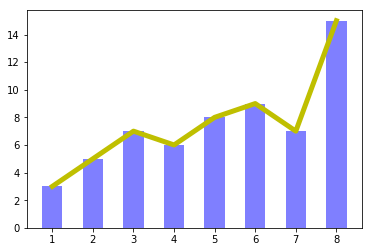

In [48]:
x = np.arange(1,9)
y = np.array([3,5,7,6,8,9,7,15])
plt.plot(x,y,'r')# 折线图 第三个参数是color第四个参数是线条的宽度
plt.plot(x,y,'y',lw = 5)
plt.bar(x,y,0.5,alpha = 0.5,color = 'b')# 柱状图 第三个参数是柱宽占比，第四个参数是透明度，第五个参数是颜色
plt.show()

# 图片缩放方法与简单实现
缩放的本质就是将原图的像素点按一定规则提取出来，形成新的图像，理论上讲如果像素点是连续的，那么直接插值即可，然而实际中像素点是离散的，所以要根据一定的方法选择用哪些点代替插值后的像素点。距离插值点最近的四个点一定组成一个横纵坐标为整数的小方块。
## 1 最近邻域插值
选择小方块中距离插值点最近的点作为其近似点。插值点的数据来自于原图的像素数据
## 2 双线性插值
将插值点进行两次投影，让后利用结果计算最终插值点的值，插值点的数据来自于原图数据的插值

In [9]:
'''
最近邻域插值的算法原理：确定
'''
img = cv2.imread('1.JPG',1)
height, width = img.shape[:2]
dst_h = int(height / 2)
dst_w = int(width / 2)
dst_image = np.zeros_like(img)#这样有留黑 #np.zeros((dst_h,dst_w,3),np.uint8) #0-255 
for i in range(dst_h):
    for j in range(dst_w):
        i_new = int(i * (height * 1.0 / dst_h))
        j_new = int(j * (width * 1.0 / dst_w))
        dst_image[i,j] = img[i_new,j_new]
#dst = cv2.resize(img,(dst_h,dst_w))
cv2.imshow('dst',dst_image)
cv2.waitKey()

-1

# 图片操作

操作|实质
--------|------------------------
图片剪切|相当于图片像素矩阵的切片
图片位移|平移像素点，利用平移矩阵的乘法进行移位运算
图片镜像|创建所需画布，并逐个赋予相应像素颜色取值
图片仿射变幻|（位移，旋转，缩放）确定三个点对图片进行拉伸

# 图片特效

|操作|实质|API|
| :-: | :-: | :-: |
|**图像灰度** |RGB值相加取均值 或 RGB进行线性组合| cv2.cvtColor(name, cv2.COLOR_BGR2GRAY)|
|**底板效果** |RGB值取反：彩色取反or灰度取反|  |
|**马赛克效果**|定义多个像素组成的小块，指定某一个色素值取代小块的色素值| |
|**毛玻璃效果**|定义多个像素组成的小块，在每一个小块中为每个像素指定色素值| |
|**融合效果** |两张图片的像素融合| |
|**颜色映射** |为每一个色素值指定新的色素值| |
|**边缘检测** |卷积运算进行边缘二值化只保留边缘信息| |
|**浮雕效果** |相邻像素相减突出边缘特征，再增加一个固定的值提升灰度等级| |
|**颜色风格** |利用查找表一一映射，获利用公式，如果公式十分复杂则查找表性能要更好| |
|**油画效果** |转化灰度，划分小块（10 * 10），分成灰度等级，统计最多的等级，任选一个符合要求的像素值，代替当前的小块| |

# 灰度算法的优化

灰度处理是图像运算的基础，因此要求一定的实时性，要求快速完成，快速实现

## 优化思路(减少乘除运算次数，并用移位代替乘除)

1.定点运算快于浮点运算
2.加减运算快于乘除运算
3.移位操作快于乘除运算
### 算法实现思路如下
灰度公式：$0.299r + 0.587g + 0.114b$

优化这个公式：$(r + 2g + b) / 4$

继续优化这个公式：$(r + (g<<1) + b)$>>2

**向量化编程也是代码性能提高的关键因素**

In [12]:
'''
灰度公式的循环未优化实现
'''
def grey_0():
    img = cv2.imread('1.JPG',1)
    height,width = img.shape[:2]
    dst = np.zeros_like(img)
    for i in range(height):
        for j in range(width):
            (b,g,r) = img[i,j]
            grey = r * 0.299 + g * 0.587 + b * 0.114 
            dst[i,j] = grey
    cv2.imshow('dst',dst)
    cv2.waitKey()
%time grey_0()

Wall time: 24.3 s


In [14]:
'''
灰度公式的优化实现
'''
def grey_1():
    img = cv2.imread('1.JPG',1)
    height,width = img.shape[:2]
    dst = np.zeros_like(img)
    for i in range(height):
        for j in range(width):
            (b,g,r) = img[i,j]
            b = int(b)
            g = int(g)
            r = int(r)
            grey = (r + (g << 1) + b) >> 2
            dst[i,j] = grey
    cv2.imshow('dst',dst)
    cv2.waitKey()
%time grey_1()

Wall time: 11.2 s


精度运算比正常的方法快了一倍，但是值得注意的是，移位操作要用括号保持运算优先性。下面看看内置函数数的性能

In [5]:
def grey_2():
    img = cv2.imread('1.JPG',1)
    height,width = img.shape[:2]
    dst = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    cv2.imshow('dst',dst)
    cv2.waitKey(0)
%time grey_2()

Wall time: 2.26 s


内置函数仅仅需要不到3秒钟就可以完成，效果又提升了5倍

# 图形绘制

| 操作 | 过程 | API |
| :-: | :-: | :-: |
| 线段绘制 | 初始化画布后绘制 | cv2.line(dst,(begin),(end),(color bgr),line_width, cv2.LINE_AA # line_type) |
| 绘制三角形 | 三条线首尾相连 | cv2.line(dst,(begin),(end),(coler bgr)) * 3 |
| 绘制矩形 | 定位一条对角线以构造矩形 | cv2.rectangle(img,(左上角),(右下角),(color bgr),-1#填充 >0 #线条宽度 |
| 绘制圆形 | 定位圆心和半径 | cv2.circle(img,(begin),radius,(color bgr),-1#填充 >0 #线条宽度)|
| 绘制椭圆（圆弧） | 定位圆心，轴长，偏转角度，偏转位置 | cv2.ellipse（ds,(圆心),(轴长）,圆弧角度，起始角度，终止角度，(color bgr),-1#填充 |
| 绘制任意多边形 | 定位多边形的定点 | cv2.polylines(dst,[points],True,(color bgr)) |

# 文字图片绘制

| 操作 | 过程 | API |
| :-: | :-: | :-: |
| 绘制文字 | 设置字体，调用API | cv2.putText(img,'Text',(begin),font,font_size,(color rgb),line_ width,cv2.LINE_AA # line_type |
| 绘制图片 | 缩小图片，放在固定的位置 | cv2.resize(img,(width,height)) |

# 图片美化

| 操作 | 过程 | 效果 |
| :-: | :-: | :-: |
| 直方图均值化 | 直方图：0-255的概率密度函数 均值化：让聚合在一起的直方图尽可能分开 | 图片变亮变清晰 |
| 图片修补 | 准备蒙版图片，尽可能描述待修补区域 | 修补有缺陷的图像 |
| 亮度增强 | 将灰度值增加一个固定值或者变为原来的1.1-1.2倍 | 图像整体变亮 |
| 磨皮美白 | 双边滤波器实现 | 去雀斑，皮肤美白 |
| 图片滤波 | 高斯滤波，中值滤波，均值滤波 | 图像得到滤波处理 |
| 图形卷积 | 矩阵对应元素相乘再相加 | 边缘检测 |

## 彩色图片直方图

In [3]:
def ImageHist(image,type):
    color = (255,255,255)
    windowName = 'Gray'
    if type == 31:
        color = (255,0,0)
        windowName = 'B Hist'
    elif type == 32:
        color = (0,255,0)
        windowName = 'G Hist'
    elif type == 33:
        color = (0,0,255)
        windowName = 'R Hist'
    #绘制直方图：image，通道（0灰度，1彩色），mask蒙版，直方图size，像素范围 
    hist = cv2.calcHist([image],[0],None,[256],[0.0,255.0]) 
    minV,maxV,minL,maxL = cv2.minMaxLoc(hist)
    histImg = np.zeros([256,256,3],np.uint8)
    for h in range(256):
        intenNormal = int(hist[h] * 256 / maxV) #归一化处于0-256之间
        cv2.line(histImg,(h,256),(h,256-intenNormal),color)
    cv2.imshow(windowName,histImg)
    return histImg

img = cv2.imread('1.JPG',1) 
channels = cv2.split(img) # RGB - R G B
for i in range(0,3):
    ImageHist(channels[i],31+i)#若是31，32，33以外的数则显示灰度直方图
cv2.waitKey(0)    

-1

## 直方图均值化

觉得更不如说是对比度增加，将RGB值的集中程度变为两极趋势  
- 灰度图像的直方图均值化对比结果：
    * grey = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    * API：cv2.equalizeHist(grey)

In [3]:
img = cv2.imread('1.JPG',1) 
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
cv2.imshow('src',gray)
dst = cv2.equalizeHist(gray)
cv2.imshow('dst',dst)
cv2.waitKey(0)

-1

* 彩色图像的直方图均值化结果
    * (b, g, r) = cv2.split(img) # 返回三通道数组
    * API：cv2.equalizeHist()只能处理单通道，需要对彩色图片进行通道转化

In [7]:
img = cv2.imread('1.JPG',1) 
cv2.imshow('src',img)
(b, g, r) = cv2.split(img)
bH = cv2.equalizeHist(b)
gH = cv2.equalizeHist(g)
rH = cv2.equalizeHist(r)
dst = cv2.merge((bH,gH,rH))
cv2.imshow('dst',dst)
cv2.waitKey(0)

-1

* YUV 图像均值化

In [11]:
img = cv2.imread('1.JPG',1) 
cv2.imshow('src',img)
imgYUV = cv2.cvtColor(img,cv2.COLOR_BGR2YCrCb)
channelYUV = cv2.split(imgYUV)
channelYUV[0] = cv2.equalizeHist(channelYUV[0])
channels = cv2.merge(channelYUV)
dst = cv2.cvtColor(channels,cv2.COLOR_YCrCb2BGR)
cv2.imshow('dst',dst)
cv2.waitKey(0)

-1

## 图片修补
* 需要蒙版 paint：标记处要修补的位置
    * API：cv2.inpaint(待修补图片,paint,3，cv2.INPAINT_TELEA)

## 图片滤波
* 高斯滤波
    * API：cv2.GaussianBlur(img,(5.5),1.5) #高斯模糊
* 均值滤波
    * 卷积和均值处理原像素值
* 中值滤波
    * 卷积和中位数处于原像素值

# 机器学习在图像处理中的应用
| 内容 | 应用 |
| :-: | :-: |
| 视频与文件的分解合成 | 样本的采集 |
| Hog 特征原理 | 物体识别，行人检测 |
| Haar特征原理 | 人脸识别 |
| Adaboost分类器 | 集成分类器 |
| SVM分类器 | 单分类器 |  

## 视频分解图片&图片合成视频
* 用于获得数据
* API:

```
cv2.VideoCapture('视频路径') # 打开视频`
cap.isOpened # 查看视频是否可以打开
fps = cap.get(cv2.CAP_PROP_FPS) # 获得图片帧率
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
(flag,frame) = cap.read() # 读取每一帧 是否成功：flag(True or Flase) 图片内容：frame
cv2.imwrite(filename,frame,[cv2.IMWRITE_JPEG QUALITY,100]) # 写入图片并控制质量
```
* 取出多少图片需要用while循环控制

* API:

```
cv2.imread('image1,jpg')
size = img.shape[:2] # (height, width)
VideoWrite = cv2.VideoWriter('file_name',-1,5,size) # 写入对象 1 file_name 2 编码器 3 帧率（每秒展示多少图片）4 尺寸
VideoWrite.write(img) # 写入方法 1 jpg data
```
* 先创建对象，然后用方法写入

## Haar特征  
* 以上特征就是用一系列的算法计算提取出来的  
* 通过特征训练出来的模型会以xml格式储存，或者其他超文本标记语言格式储存  

加载模型之后 加载预测文件 再预测  

## Hog特征  
* 模块的划分
    * image：整个图片
    * win：窗体（特征计算最顶层单元，包含目标所有的描述信息，大小任意64 * 128） win step
    * block：模块（小于win的大小，且win的宽高是其宽高的整数倍16 * 16） block step：在win下滑动8 * 8
    * cell：最小单元8 * 8 在block中滑动，按照推荐比例，block中就有4个cell
    * bin：9个bin 包含360度信息，一个cell要包含9个bin
    * hog特征纬度：105 * 4 * 9 = 3780
    * 梯度的大小和方向：
* 模版计算梯度和方向
* 计算bin和投影  
* 计算每个模块的Hog特征

两种方法都依赖于特征模版的滑动